['000002.XSHE' '000063.XSHE' '000100.XSHE' '000157.XSHE' '000166.XSHE'
 '000301.XSHE' '000338.XSHE' '000408.XSHE' '000425.XSHE' '000538.XSHE'
 '000568.XSHE' '000596.XSHE' '000625.XSHE' '000651.XSHE' '000661.XSHE'
 '000708.XSHE' '000723.XSHE' '000725.XSHE' '000786.XSHE' '000792.XSHE'
 '000800.XSHE' '000858.XSHE' '000876.XSHE' '000877.XSHE' '000963.XSHE'
 '000977.XSHE' '001979.XSHE' '002007.XSHE' '002008.XSHE' '002027.XSHE'
 '002032.XSHE' '002049.XSHE' '002050.XSHE' '002064.XSHE' '002120.XSHE'
 '002129.XSHE' '002142.XSHE' '002179.XSHE' '002241.XSHE' '002271.XSHE'
 '002311.XSHE' '002410.XSHE' '002414.XSHE' '002415.XSHE' '002459.XSHE'
 '002460.XSHE' '002466.XSHE' '002475.XSHE' '002493.XSHE' '002555.XSHE'
 '002594.XSHE' '002600.XSHE' '002601.XSHE' '002709.XSHE' '002736.XSHE'
 '002756.XSHE' '002812.XSHE' '002841.XSHE' '002916.XSHE' '002920.XSHE'
 '002938.XSHE' '003816.XSHE' '300015.XSHE' '300059.XSHE' '300122.XSHE'
 '300124.XSHE' '300142.XSHE' '300207.XSHE' '300223.XSHE' '300408.XSHE'
 '3004

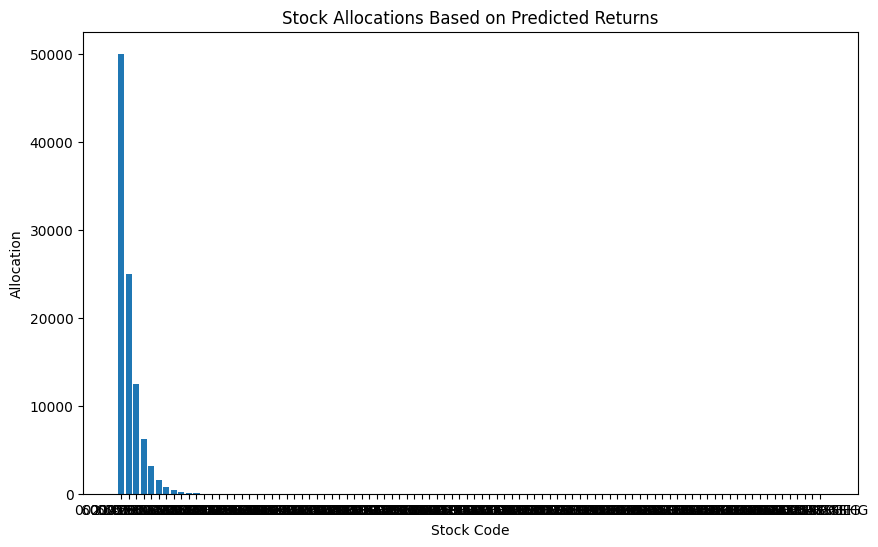

002142.XSHE: 50000.0
600019.XSHG: 25000.0
000568.XSHE: 12500.0
600031.XSHG: 6250.0
601988.XSHG: 3125.0
601155.XSHG: 1562.5
601601.XSHG: 781.25
601288.XSHG: 390.625
603185.XSHG: 195.3125
002756.XSHE: 97.65625
600884.XSHG: 48.828125
600362.XSHG: 24.4140625
601398.XSHG: 12.20703125
601138.XSHG: 6.103515625
601799.XSHG: 3.0517578125
000786.XSHE: 1.52587890625
300595.XSHE: 0.762939453125
002466.XSHE: 0.3814697265625
601816.XSHG: 0.19073486328125
600900.XSHG: 0.095367431640625
601698.XSHG: 0.0476837158203125
601688.XSHG: 0.02384185791015625
600585.XSHG: 0.011920928955078125
000301.XSHE: 0.0059604644775390625
600426.XSHG: 0.0029802322387695312
600809.XSHG: 0.0014901161193847656
300759.XSHE: 0.0007450580596923828
000651.XSHE: 0.0003725290298461914
601628.XSHG: 0.0001862645149230957
000002.XSHE: 9.313225746154785e-05
000596.XSHE: 4.6566128730773926e-05
002415.XSHE: 2.3283064365386963e-05
000800.XSHE: 1.1641532182693481e-05
601318.XSHG: 5.820766091346741e-06
000661.XSHE: 2.9103830456733704e-06
0

In [4]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Mount Google Drive if not already mounted
from google.colab import drive
if not os.path.exists('/content/drive/MyDrive'):
    try:
        drive.mount('/content/drive', force_remount=True)
    except:
        print("Error: Could not mount Google Drive. Please check your connection and try again.")

# Load the trained model
model = lgb.Booster(model_file='/content/drive/MyDrive/final_lgbm_model_original2.txt')


# Load the latest stock data
data = pd.read_csv('/content/drive/MyDrive/backtest_data.csv（副本）')


selected_codes = data[data['tradingDate'] == '2021-11-01']['windCode'][data['return'].notnull()].unique()
print(selected_codes)

X_column_original=['alpha047', 'alpha076', 'alpha063', 'alpha115', 'alpha005', 'alpha057',
       'alpha139', 'alpha016', 'alpha145', 'alpha064', 'alpha008', 'alpha028',
       'alpha014', 'alpha121', 'alpha010', 'alpha127', 'alpha146', 'alpha066',
       'alpha108', 'alpha157', 'alpha078', 'alpha073', 'alpha041', 'alpha029',
       'alpha179', 'alpha170', 'alpha065', 'alpha062', 'alpha048', 'alpha159',
       'alpha070', 'alpha015', 'alpha022', 'alpha033', 'alpha168', 'alpha113',
       'alpha102', 'alpha074', 'alpha090', 'alpha025', 'alpha083', 'alpha104',
       'alpha006', 'alpha176', 'alpha019', 'alpha099', 'alpha018', 'alpha020',
       'alpha080', 'alpha001'] 
       
       
def X_input_original(filepath,date,code):
  data1=pd.read_csv(filepath)
  input=data1[(data1['tradingDate'] == date) & (data1['windCode'] == code)][X_column_original]
  return input

# Load input data for 2021-11-01
X_original = X_input_original('/content/drive/MyDrive/backtest_data.csv（副本）', '2021-11-01', selected_codes[0])

# Define the buy and sell thresholds
buy_threshold = 0.3
sell_threshold = -0.1

# Calculate the predicted returns for all stocks in the backtest data for the target date
returns = []
for code in selected_codes:
  X = X_input_original('/content/drive/MyDrive/backtest_data.csv（副本）', '2021-11-01', code)
  predicted_return = model.predict(X)[0]
  returns.append((code, predicted_return))

# Sort the returns in descending order
sorted_returns = sorted(returns, key=lambda x: x[1], reverse=True)

# Allocate the cash based on the predicted returns
cash_remaining = 100000
allocations = {}
for i, (code, predicted_return) in enumerate(sorted_returns):
  if predicted_return >= buy_threshold:
    # Buy the stock
    allocation = cash_remaining * 0.5
    cash_remaining -= allocation
    allocations[code] = allocation
  elif predicted_return <= sell_threshold:
    # Sell the stock
    allocation = -allocations.get(code, 0)
    cash_remaining += allocation
    allocations[code] = 0

# Plot the allocations
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(allocations.keys(), allocations.values())
ax.set_xlabel('Stock Code')
ax.set_ylabel('Allocation')
ax.set_title('Stock Allocations Based on Predicted Returns')
plt.show()

for code, allocation in sorted(allocations.items(), key=lambda x: x[1], reverse=True):
    print(f"{code}: {allocation}")


We can utilize the trained lgbm model to forecast the next day's return value. As a result, in this trading technique, we initially chose a trading date of 2011.11.01 at random and screened out stocks with an increase rate on this date based on backtest data. Then we set a buy threshold of 0.3, a sell threshold of -0.1, and let's pretend we now have $100,000 cash. We then use a for loop to compute the anticipated returns for all the selected stocks in the backtest data for the target date and append the returns to a list. The output is the expected return on these stocks in 2021.11.02. Next,  we allocates the cash based on the predicted returns using another for loop. If the predicted return is greater than or  equal to the buy threshold,  it buys the stock by allocating 50% of the cash to these stock on a step-by-step basis.If the predicted return is less than or equal  to the sell threshold, it sells the stock by freeing up the allocation to that stock. Finally,  we plot the stock allocations using a bar plot with the stock codes on the x-axis and the allocations on the y-axis. The  plot is titled "Stock Allocations Based on Predicted Returns". and we print out the stocks we decided to buy in proportion  to their allotments